In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\sharm\OneDrive\Documents\datasets\lung_cancer_data.csv")

In [78]:
df.head()#to view data
#2 means yes, 1 means no

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [79]:
df.duplicated().sum()#to find the duplicates

33

In [80]:
df=df.drop_duplicates() #to delete duplicates

In [81]:
df.isnull().sum() #to check for null values


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [82]:
df.describe

<bound method NDFrame.describe of     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
279      F   59        1               2        2              2   
280      F   59        2               1        1              1   
281      M   55        2               1        1              1   
282      M   46        1               2        2              1   
283      M   60        1               2        2              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1  

In [83]:
#as in this dataset yes means 2 and no means 1 we will convert it such that yes means 1 and no means 0 using LabelEncoder which
#is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. 
#It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

from sklearn import preprocessing
le=preprocessing.LabelEncoder()

df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,0,1,1,1,0,0,1,1,0,1,0,1,0,YES
280,F,59,1,0,0,0,1,1,1,0,0,0,1,0,0,NO
281,M,55,1,0,0,0,0,1,1,0,0,0,1,0,1,NO
282,M,46,0,1,1,0,0,0,0,0,0,0,0,1,1,NO


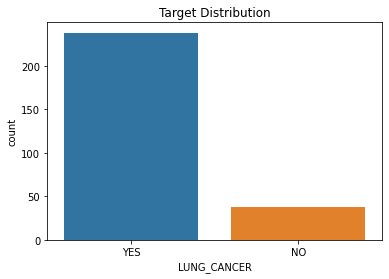

In [84]:
#to check the distributaion of Target variable.
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');
#conclusion:target distribution is not balanced

In [85]:
#to get exact number with lung cancer
df['LUNG_CANCER'].value_counts()

YES    238
NO      38
Name: LUNG_CANCER, dtype: int64

In [86]:
#to check various factors and there effects in lung cancer we will create a function to plot them and plot them
def plot(col,df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar',figsize=(10,5))

<AxesSubplot:xlabel='GENDER'>

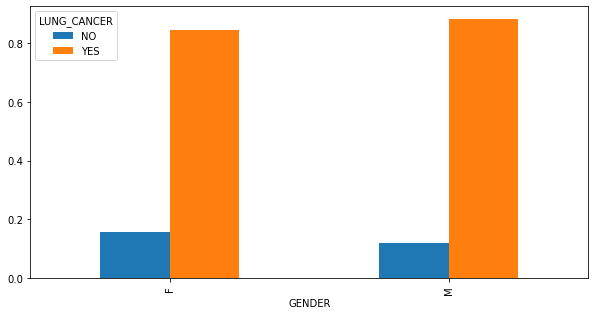

In [87]:
plot('GENDER')

<AxesSubplot:xlabel='AGE'>

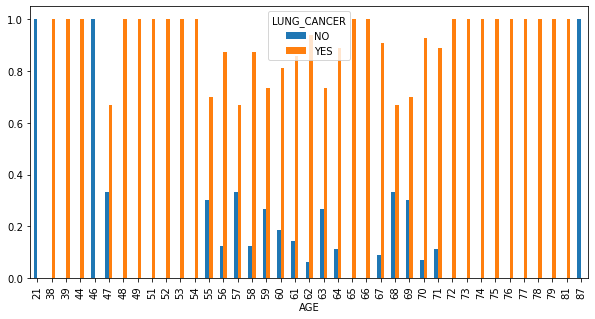

In [88]:
plot('AGE')

<AxesSubplot:xlabel='SMOKING'>

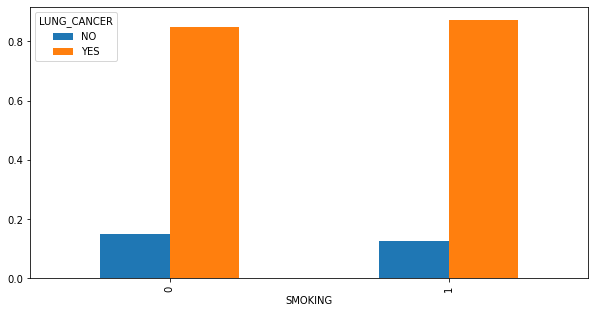

In [89]:
plot('SMOKING')

<AxesSubplot:xlabel='YELLOW_FINGERS'>

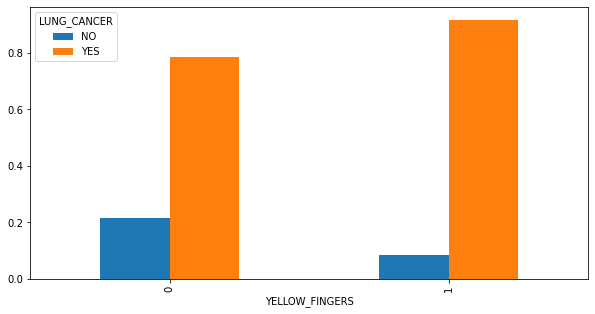

In [90]:
plot('YELLOW_FINGERS')

<AxesSubplot:xlabel='ANXIETY'>

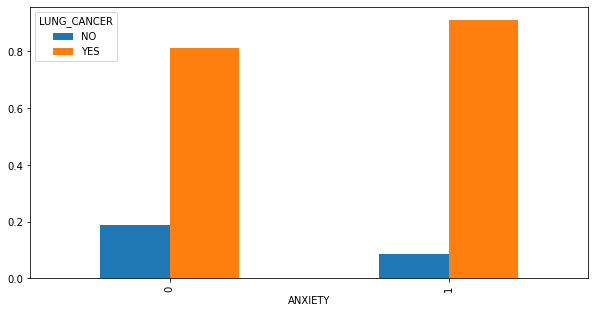

In [91]:
plot('ANXIETY')

<AxesSubplot:xlabel='PEER_PRESSURE'>

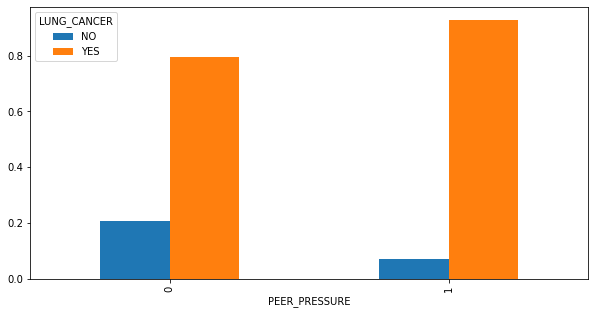

In [92]:
plot('PEER_PRESSURE')

<AxesSubplot:xlabel='CHRONIC DISEASE'>

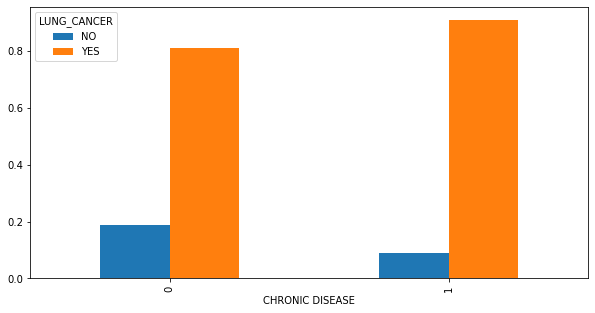

In [93]:
plot('CHRONIC DISEASE')

<AxesSubplot:xlabel='FATIGUE '>

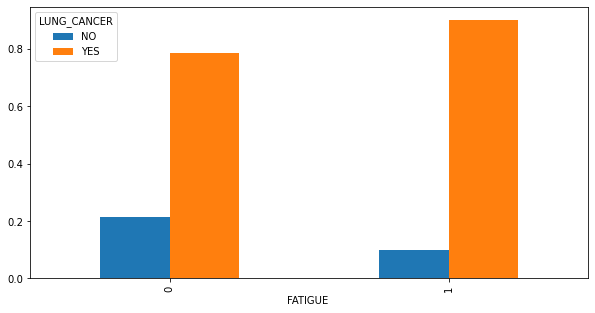

In [94]:
plot('FATIGUE ')

<AxesSubplot:xlabel='ALLERGY '>

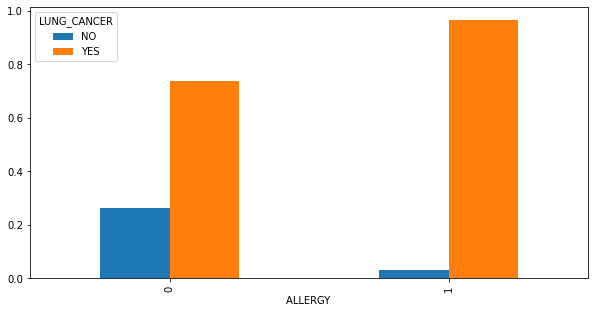

In [95]:
plot('ALLERGY ')

<AxesSubplot:xlabel='WHEEZING'>

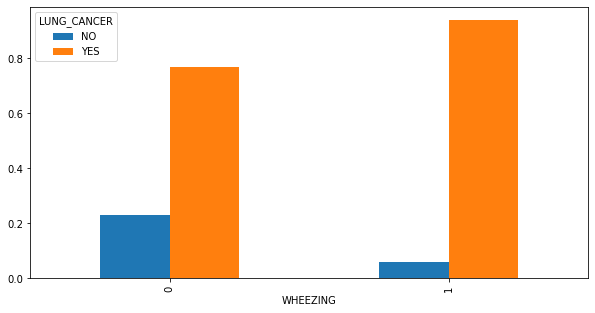

In [96]:
plot('WHEEZING')

<AxesSubplot:xlabel='ALCOHOL CONSUMING'>

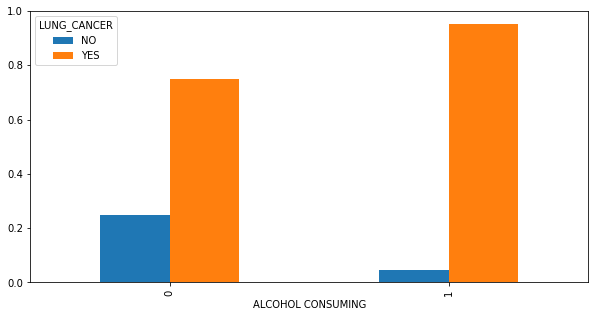

In [97]:
plot('ALCOHOL CONSUMING')

<AxesSubplot:xlabel='COUGHING'>

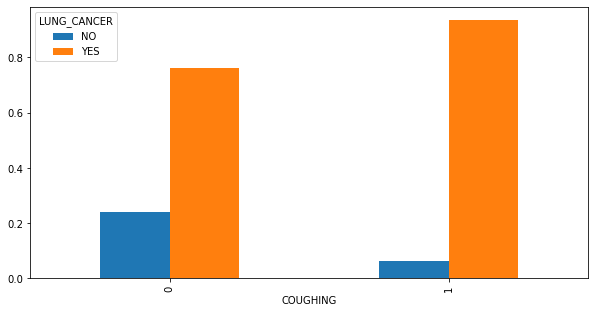

In [98]:
plot('COUGHING')

<AxesSubplot:xlabel='SHORTNESS OF BREATH'>

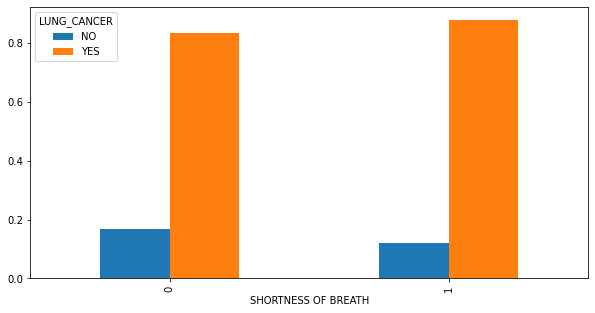

In [99]:
plot('SHORTNESS OF BREATH')

<AxesSubplot:xlabel='SWALLOWING DIFFICULTY'>

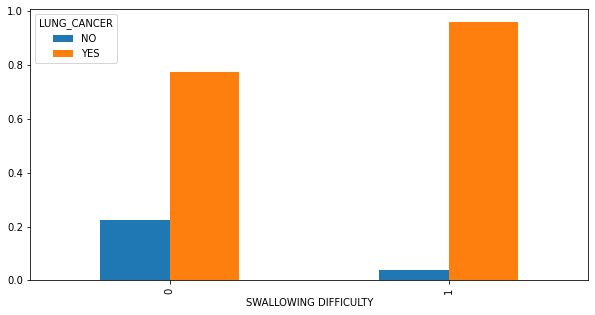

In [100]:
plot('SWALLOWING DIFFICULTY')

<AxesSubplot:xlabel='CHEST PAIN'>

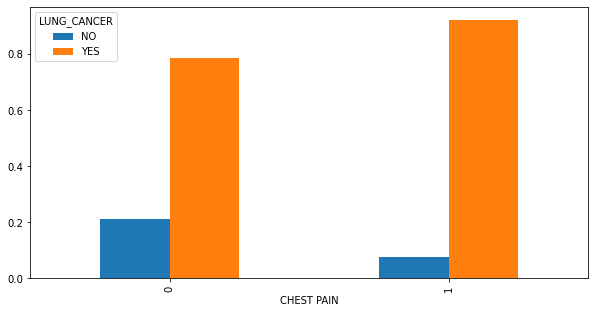

In [101]:
plot('CHEST PAIN')

In [102]:
#from above plots we can conclude that according to data given shortness of breath, gender,smoking,age doesn't have significant relationship with lung cancer
#hence we will drop these 3 columns
df_new=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])

In [107]:
df_new.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,YES
1,0,0,0,1,1,1,0,0,0,1,1,YES
2,0,0,1,0,1,0,1,0,1,0,1,NO
3,1,1,0,0,0,0,0,1,0,1,1,NO
4,1,0,0,0,0,0,1,0,1,0,0,NO


In [108]:
#finding correlation between columns
cr=df_new.corr()
cr
#we can see yellow fingers and anxiety have more than 50% correlation

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN
YELLOW_FINGERS,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169
ANXIETY,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182
PEER_PRESSURE,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,0.327764,-0.074655
CHRONIC DISEASE,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895
FATIGUE,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757
ALLERGY,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440
WHEEZING,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846
ALCOHOL CONSUMING,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767
COUGHING,0.020803,-0.218843,-0.068224,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988
SWALLOWING DIFFICULTY,0.333349,0.478820,0.327764,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674


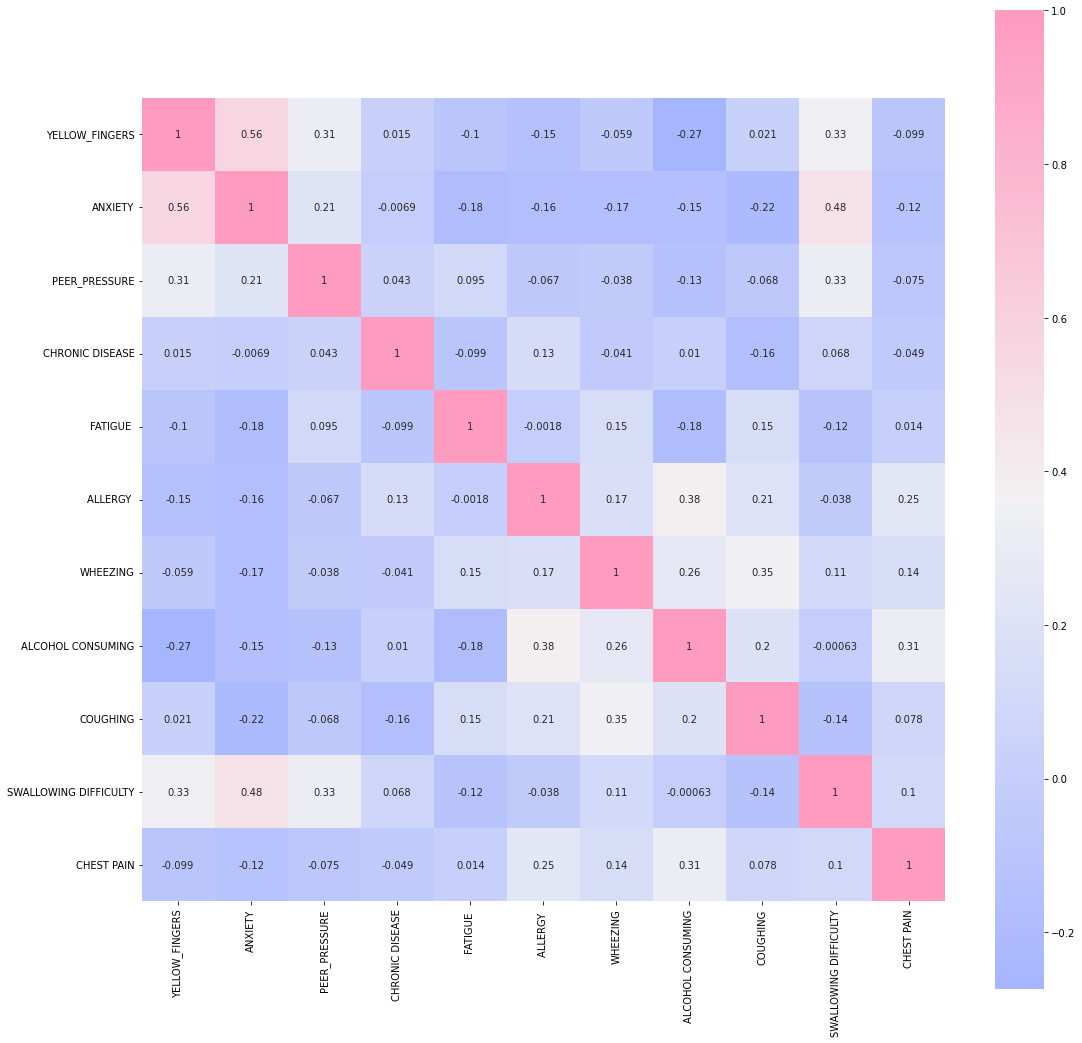

In [119]:
cmap=sns.diverging_palette(260,-10,s=100, l=75, n=5,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cr,cmap=cmap,annot=True, square=True)
plt.show()

<AxesSubplot:>

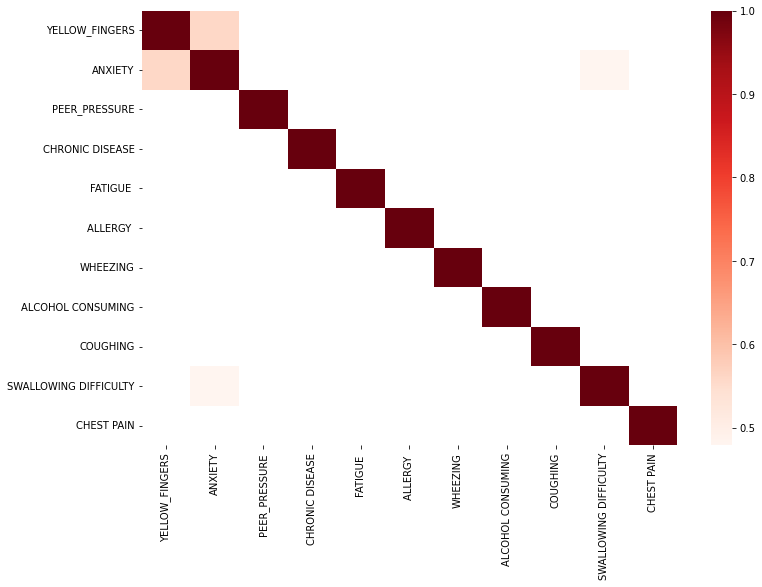

In [127]:
rew=cr[cr>0.40]
plt.figure(figsize=(12,8))
sns.heatmap(rew,cmap='Reds')

In [128]:
#since ANXIETY and YELLOW_FINGERS are correlated more than 50%. So, lets create a new feature combining them.
df_new['ANXYELFIN']=df_new['ANXIETY']*df_new['YELLOW_FINGERS']
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,1,1,0,0,1,0,1,1,1,1,1,YES,1
1,0,0,0,1,1,1,0,0,0,1,1,YES,0
2,0,0,1,0,1,0,1,0,1,0,1,NO,0
3,1,1,0,0,0,0,0,1,0,1,1,NO,1
4,1,0,0,0,0,0,1,0,1,0,0,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,YES,1
280,0,0,0,1,1,1,0,0,0,0,0,NO,0
281,0,0,0,0,1,1,0,0,0,0,1,NO,0
282,1,1,0,0,0,0,0,0,0,1,1,NO,1


In [134]:
#Splitting independent and dependent variables
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']
X

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,ANXYELFIN
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,0
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,1
4,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1
280,0,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0
282,1,1,0,0,0,0,0,0,0,1,1,1
